In [1]:
%matplotlib ipympl

import relative_imports
from spatiotemporal.SEN12MSCRTS import DatasetManager
from spatiotemporal.torch_datasets.base_dataset import BaseDataset
from tqdm import tqdm
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from os.path import join
from torch.utils.data import DataLoader
import xarray as xr
xr.set_options(display_expand_data=False)

In [2]:
root_dir='/LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRTS'
cloud_maps_dir="/LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRTS_cloud_maps"

In [3]:
dataset_manager = DatasetManager(
    root_dir=root_dir,
    cloud_maps_dir=cloud_maps_dir,
    cloud_probability_threshold=0.6
)

# dataset_manager.load_dataset()
# dataset_manager.save_to_file()
dataset_manager.load_from_file()

In [4]:
dataset_manager.data

S1  \
ROI      tile patch timestep                                                      
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
ROIs2017 146  299   25        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    26        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    27        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    28        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                                                                             S2  \
ROI      tile patch timestep                                                      
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
ROIs2017 146  299   25        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    26        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    27        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    28        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                                                                     S2CLOUDMAP  
ROI      tile patch timestep                                                     
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
...                                                                         ...  
ROIs2017 146  299   25        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    26        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    27        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    28        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  

[458790 rows x 3 columns]

# Example batch

In [5]:
class cGAN_Dataset(BaseDataset):

    def __init__(self, dataset_manager):
        super().__init__(dataset_manager)

    def initialize_data(self):
        return self.manager.data[["S1"]]

    def __getitem__(self, idx):
        sample = super().__getitem__(idx)
        filepath = sample[(0, "S1")]
        s1_image = self.utils.read_tif_fast(filepath)
        return {"S1": s1_image, "index": idx}

In [6]:
dataset = cGAN_Dataset(dataset_manager=dataset_manager)
len(dataset)

458790

In [8]:
data_loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=False,
    # num_workers=32,
    # prefetch_factor=2,
    drop_last=False
)
len(data_loader), len(data_loader)*64

(7169, 458816)

In [9]:
iterator = iter(data_loader)
batch = next(iterator)

In [10]:
batch["index"]

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [11]:
image = batch["S1"]
image.shape, image.dtype

(torch.Size([64, 2, 256, 256]), torch.float64)

In [12]:
dataset_manager.data.iloc[batch["index"]]

S1  \
ROI      tile patch timestep                                                      
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
              1     29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              2     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                                                                             S2  \
ROI      tile patch timestep                                                      
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
              1     29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              2     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                                                                     S2CLOUDMAP  
ROI      tile patch timestep                                                     
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
...                                                                         ...  
              1     29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
              2     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  

[64 rows x 3 columns]

# Process whole dataset

### Create DataFrame to store zero pixels

In [13]:
polarizations = ["VV", "VH"]

In [14]:
zero_pixels_df_batch = pd.DataFrame(
    data=pd.NA,
    columns=polarizations,
    index=dataset_manager.data.index,
    dtype=pd.Int64Dtype()
)

zero_pixels_df_batch

VV    VH
ROI      tile patch timestep            
ROIs1158 106  0     0         <NA>  <NA>
                    1         <NA>  <NA>
                    2         <NA>  <NA>
                    3         <NA>  <NA>
                    4         <NA>  <NA>
...                            ...   ...
ROIs2017 146  299   25        <NA>  <NA>
                    26        <NA>  <NA>
                    27        <NA>  <NA>
                    28        <NA>  <NA>
                    29        <NA>  <NA>

[458790 rows x 2 columns]

In [15]:
zero_pixels_df_batch.iloc[batch["index"]]

VV    VH
ROI      tile patch timestep            
ROIs1158 106  0     0         <NA>  <NA>
                    1         <NA>  <NA>
                    2         <NA>  <NA>
                    3         <NA>  <NA>
                    4         <NA>  <NA>
...                            ...   ...
              1     29        <NA>  <NA>
              2     0         <NA>  <NA>
                    1         <NA>  <NA>
                    2         <NA>  <NA>
                    3         <NA>  <NA>

[64 rows x 2 columns]

In [16]:
zero_pixels_df_batch.iloc[batch["index"].numpy()] = batch["S1"].isnan().sum(axis=(-2, -1)).numpy()
zero_pixels_df_batch.dropna()

VV  VH
ROI      tile patch timestep        
ROIs1158 106  0     0          0   0
                    1          0   0
                    2          0   0
                    3          0   0
                    4          0   0
...                           ..  ..
              1     29         0   0
              2     0          0   0
                    1          0   0
                    2          0   0
                    3          0   0

[64 rows x 2 columns]

### Run processing

In [17]:
data_loader_parallel = DataLoader(
    dataset,
    batch_size=64,
    shuffle=False,
    num_workers=32,
    prefetch_factor=2
)

In [18]:
zero_pixels_df = pd.DataFrame(
    data=pd.NA,
    columns=polarizations,
    index=dataset_manager.data.index,
    dtype=pd.Int64Dtype()
)

In [19]:
for batch in tqdm(data_loader_parallel, desc="Counting NaN pixels...", unit=" batch"):
    zero_pixels_df.iloc[batch["index"].numpy()] = batch["S1"].isnan().sum(axis=(-2, -1)).numpy()

zero_pixels_df.to_csv(join(dataset_manager.project_directory, "stats", "S1_NaN_pixels_count.csv"))

Counting NaN pixels...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7169/7169 [09:58<00:00, 11.98 batch/s]


# Analyze results

In [13]:
utils = dataset_manager.utils

In [14]:
zero_pixels_df_saved = pd.read_csv(
    join(dataset_manager.project_directory, "stats", "S1_NaN_pixels_count.csv"), 
    index_col=["ROI", "tile", "patch", "timestep"]
)
print(f"Unprocessed S1 images: {zero_pixels_df_saved.isna().sum()}")
zero_pixels_df_saved

Unprocessed S1 images: VV    0
VH    0
dtype: int64


VV  VH
ROI      tile patch timestep        
ROIs1158 106  0     0          0   0
                    1          0   0
                    2          0   0
                    3          0   0
                    4          0   0
...                           ..  ..
ROIs2017 146  299   25         0   0
                    26         0   0
                    27         0   0
                    28         0   0
                    29         0   0

[458790 rows x 2 columns]

In [15]:
no_zero_pixels_df = zero_pixels_df_saved[zero_pixels_df_saved.sum(axis=1) == 0]
some_zero_pixels_df = zero_pixels_df_saved[zero_pixels_df_saved.sum(axis=1) != 0]

assert no_zero_pixels_df.shape[0] + some_zero_pixels_df.shape[0] == zero_pixels_df_saved.shape[0]
some_zero_pixels_df

VV   VH
ROI      tile patch timestep         
ROIs1868 119  0     12         0    3
              1     12         0   17
              2     12         0    8
              3     12         0   58
              4     12         0  175
...                           ..  ...
ROIs1970 139  0     25         1    1
                    26         1    1
                    27         1    1
                    28         1    1
                    29         1    1

[294 rows x 2 columns]

In [16]:
partially_zero_df = some_zero_pixels_df[some_zero_pixels_df.sum(axis=1) < 256*256*2]
partially_zero_df

VV   VH
ROI      tile patch timestep         
ROIs1868 119  0     12         0    3
              1     12         0   17
              2     12         0    8
              3     12         0   58
              4     12         0  175
...                           ..  ...
ROIs1970 139  0     25         1    1
                    26         1    1
                    27         1    1
                    28         1    1
                    29         1    1

[294 rows x 2 columns]

In [17]:
fully_zero_df = some_zero_pixels_df[some_zero_pixels_df.sum(axis=1) >= 256*256*2]
fully_zero_df

,,,,VV,VH
ROI,tile,patch,timestep,,


In [18]:
assert fully_zero_df.shape[0] + partially_zero_df.shape[0] == some_zero_pixels_df.shape[0]

# Find patches with swath borders

Even though both swath borders and holes are zero-valued, these cases are not the same and need to be identified and treated differently. That's because holes can be interpolated if they are small enough, whereas swath borders must be masked out in all cases.

Swath borders have the following properties:
- they always touch at least two edges of the patch
- they are always at the edge of the tile (or neignboring a completely empty patch, but we handled that case already)
- all zero pixels of the swath border are connected
- there is only a single swath border area in the patch

**Idea:** find zero-valued areas that touch at least two patch edges. Verify, that there is at most one such area per patch

In [19]:
from skimage.measure import label

In [20]:
labeled_masks = []

for index in tqdm(partially_zero_df.index):
    image = utils.read_tif_fast(dataset_manager.data.loc[index, "S1"])
    zero_mask = np.isnan(image)
    labeled_masks.append(
        np.asarray([label(band_zero_mask) for band_zero_mask in zero_mask])
    )

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 294/294 [00:09<00:00, 31.88it/s]


In [21]:
patch_borders = [(0, slice(None)), (-1, slice(None)), (slice(None), 0), (slice(None), -1)]
object_touching_2_borders = np.zeros(partially_zero_df.shape, dtype=np.uint8)

def get_object_touching_2_borders(image):

    if image.ndim == 3:
        return np.asarray([get_object_touching_2_borders(image_band) for image_band in image])

    label_class, n_borders_touched = np.unique(
        np.concatenate(
            [np.unique(image[border]) for border in patch_borders]
        ),
        return_counts=True
    )
    label_class, n_borders_touched = label_class[1:], n_borders_touched[1:]  # remove class zero
    result = label_class[n_borders_touched >=2]
    if result.size == 0:
        return 0
    elif result.size > 1:
        raise ValueError("Something went wrong")
    else:
        return result.item()

for image_n, label_image in enumerate(labeled_masks):
    object_touching_2_borders[image_n] = get_object_touching_2_borders(label_image)

object_touching_2_borders.shape

(294, 2)

In [22]:
detected_patches_with_swath_border = partially_zero_df[object_touching_2_borders.max(axis=1) != 0]
detected_patches_without_swath_border = partially_zero_df[object_touching_2_borders.max(axis=1) == 0]

print(f"Detected swath border: {len(detected_patches_with_swath_border)}")
print(f"NO swath border: {len(detected_patches_without_swath_border)}")

Detected swath border: 42
NO swath border: 252


# Inspect patches visually

In [23]:
df_to_investigate = detected_patches_without_swath_border

In [24]:
from colorsys import hls_to_rgb, hsv_to_rgb

def s1_to_complex(s1_image, clip=False):
    
    if clip:
        s1_image = np.clip(s1_image, a_min=0, a_max=1)

    return s1_image[0] + 1j * s1_image[1]

def colorize(s1_image, hsv=False):

    rotation = np.cos(-np.pi/4) + 1j * np.sin(-np.pi/4)
    complex_image = s1_to_complex(s1_image, clip=True)
    complex_image = complex_image * rotation # rotate -45 degrees
    
    r = np.abs(complex_image) / np.sqrt(2)  # [0 .. 1]
    arg = np.angle(complex_image) / (np.pi/4)  # [-1 .. 1]

    h = 1/3 + (arg + 1) / 3  # np.clip(1/3 + (arg + 1) / 3, a_min=0, a_max=1)
    s = np.clip(np.abs(arg * 2), a_min=0, a_max=1)
    v = np.clip(r, a_min=0, a_max=1)

    if hsv:
        return np.stack([h,s,v], axis=-1)
        
    return np.stack(np.vectorize(hsv_to_rgb)(h,s,v), axis=-1)

In [25]:
with plt.ioff():
    fig_2, axs_2 = plt.subplots(nrows=4, ncols=4, figsize=(12, 12), tight_layout=True)

In [26]:
empty_image = np.ones((2, 256, 256)) * 0.75
n_batches_2 = np.ceil(df_to_investigate.shape[0] / 16).astype(int)

def update_image_2(batch_num):

    fig_2.suptitle(f"Batch: {batch_num} / {n_batches_2-1}")

    batch = df_to_investigate.iloc[16*batch_num:16*(batch_num+1)]
    S1_image_paths = dataset_manager.data.loc[batch.index, "S1"]
    S1_images = [(index, utils.read_tif_fast(image_path)) for index, image_path in S1_image_paths.items()]
    S1_images_rescaled = [(index, utils.rescale_s1(image, clip=True)) for index, image in S1_images]
    S1_images_rescaled = S1_images_rescaled + [("", empty_image)] * (16 - len(S1_images))  # if less then 16 images, append some empty images

    S1_masks = [~(~np.isnan(image)).prod(axis=0, dtype=bool) for _, image in S1_images]

    S1_images_rescaled = [(index, np.nan_to_num(image, nan=1.0)) for index, image in S1_images_rescaled]
    S1_images_colorized = [(index, colorize(image)) for index, image in S1_images_rescaled]
    
    for image_num, (ax, (index, image)) in enumerate(zip(axs_2.flatten(), S1_images_colorized)):

        ax.clear()
        
        ax.imshow(image)

        """
        try:
            ax.imshow(
                S1_masks[image_num].astype(float),
                cmap=plt.get_cmap("viridis"),
                alpha=S1_masks[image_num].astype(float) * 0.5
            )
        except IndexError:
            pass

        """
            
        ax.set_axis_off()
        ax.set_title(str(index))
        

batch_num_select_2 = widgets.BoundedIntText(
    value=0,
    min=0,
    max=n_batches_2-1,
    step=1,
    description='Batch:',
    disabled=False
)

batch_num_select_widget_2 = interactive(update_image_2, batch_num=batch_num_select_2)

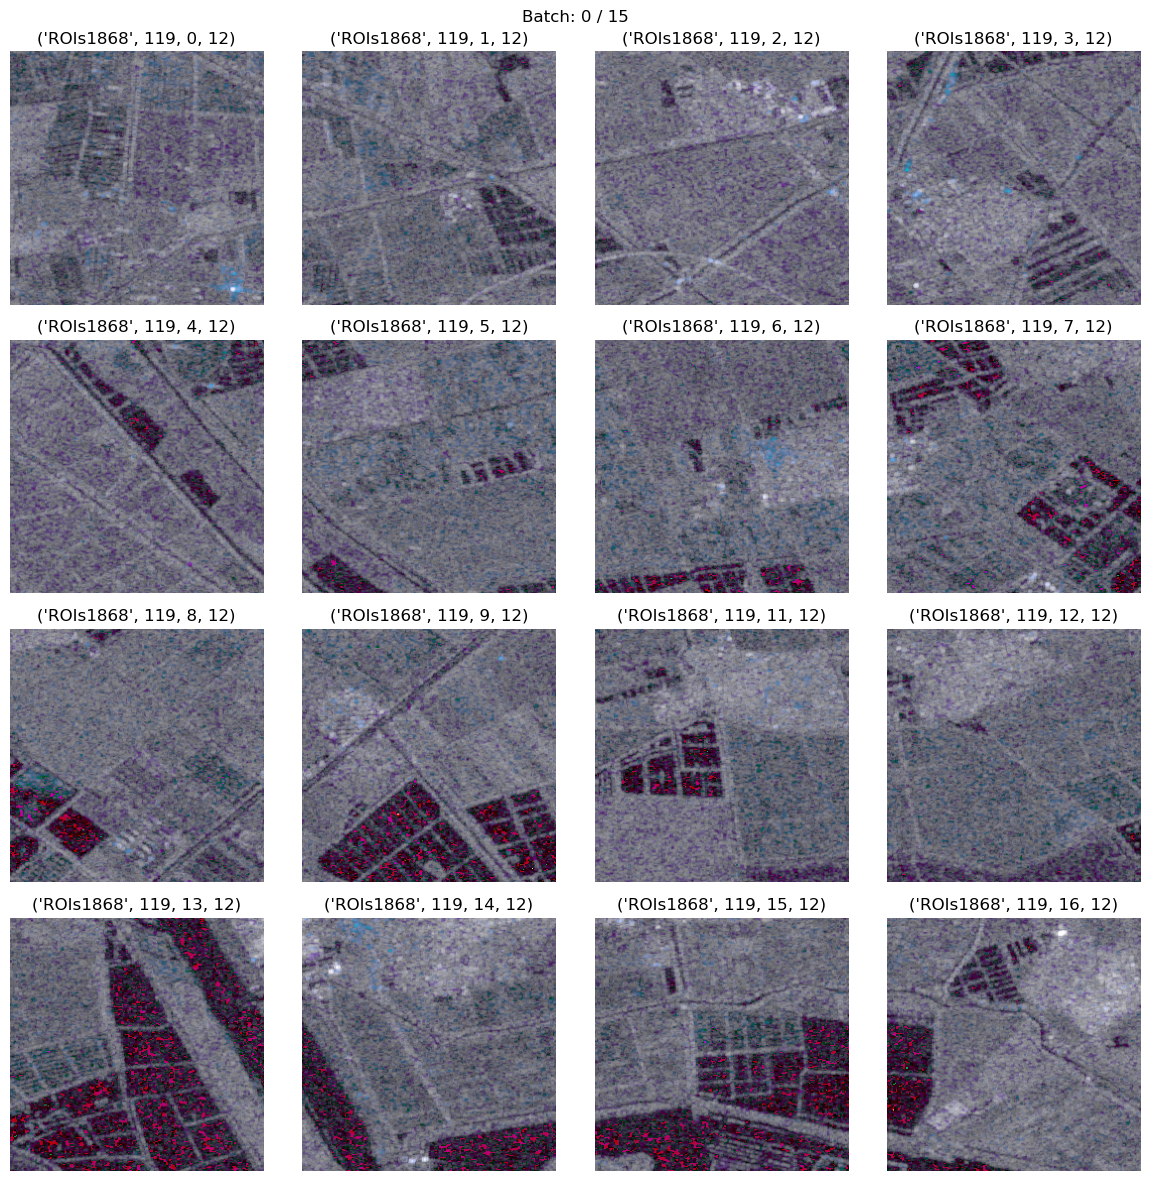

In [27]:
display(fig_2)
# display(batch_num_select_widget_2, fig_2.canvas)

In [28]:
plt.close(fig_2)

It is safe to assume that if number of pixels is small, then they can be dealt with by interpolation. Otherwise the number is too high.

We empirically set n_zero_pixels = 128 to be the threshold between these two classes

# Save results

In [161]:
patches_with_zeros = pd.DataFrame(
    True,
    index=some_zero_pixels_df.index,
    columns=["NANs"]
)

patches_with_zeros = patches_with_zeros.sort_index()
patches_with_zeros

NANs
ROI      tile patch timestep      
ROIs1868 119  0     12        True
              1     12        True
              2     12        True
              3     12        True
              4     12        True
...                            ...
ROIs1970 139  0     25        True
                    26        True
                    27        True
                    28        True
                    29        True

[294 rows x 1 columns]

In [162]:
patches_with_zeros.to_csv(join(dataset_manager.project_directory, "stats", "S1_patches_with_NANs.csv"))

# Interpolate patches and modify Dataset Manager

In [29]:
from spatiotemporal.mods import NanPixelsS1

In [30]:
NanPixelsS1(dataset_manager).apply(verbose=True)

Fixing zero pixels in S2 images...


In [31]:
dataset_manager.data["S1"].str.contains("NanPixelsS1").sum()

294